Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [ ]:
df = pd.read_csv('/content/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.info() #checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.isnull().sum() #checking null values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
# filling null values in cuisines column as unknown
fill_cuisines = df['Cuisines'].fillna('Unknown', inplace = True)

In [ ]:
df.shape #checking shape of dataset

(9551, 21)

In [ ]:
df.describe() #checking statistical summary

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


##**LEVEL 3**

####TASK - 1 -Restaurant Reviews

Analyze the text reviews to identify the most
common positive and negative keywords.

In [ ]:
from collections import Counter
import re

#Extract and clean the 'Rating text' column
reviews = df['Rating text'].dropna().tolist()

#Define a function to tokenize and clean text
def tokenize(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = text.split()  # Split into words
    return tokens

# Tokenize all reviews
all_tokens = []
for review in reviews:
    all_tokens.extend(tokenize(review))

# Step 4: Count the frequency of each token
token_counts = Counter(all_tokens)

# Display the most common tokens
print("Most common tokens:", token_counts.most_common(20))

# Step 5: Define a list of words to ignore
ignore_words = {'rated', 'very'}

# Filter out ignored words
filtered_counts = {word: count for word, count in token_counts.items() if word not in ignore_words}

# Step 6: Separate positive and negative keywords
positive_keywords = {'good', 'excellent'}
negative_keywords = {'poor', 'not'}

# Get the frequency of positive and negative keywords
positive_counts = {word: filtered_counts[word] for word in positive_keywords if word in filtered_counts}
negative_counts = {word: filtered_counts[word] for word in negative_keywords if word in filtered_counts}

# Display the counts of positive and negative keywords
print("Positive Keywords:", positive_counts)
print("Negative Keywords:", negative_counts)


Most common tokens: [('average', 3737), ('good', 3179), ('not', 2148), ('rated', 2148), ('very', 1079), ('excellent', 301), ('poor', 186)]
Positive Keywords: {'good': 3179, 'excellent': 301}
Negative Keywords: {'not': 2148, 'poor': 186}


Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

In [ ]:
df['review_length'] = df['Rating text'].dropna().str.len()  # Add a column for review length
avg_len_review = df['review_length'].mean()
print(f"Average length of reviews: {avg_len_review:.2f} characters")


Average length of reviews: 7.02 characters


In [ ]:
rating_length_mean = df.groupby('Rating text')['review_length'].mean().sort_values(ascending = False).reset_index()
rating_length_mean

,Rating text,review_length
0,Excellent,9.0
1,Not rated,9.0
2,Very Good,9.0
3,Average,7.0
4,Good,4.0
5,Poor,4.0


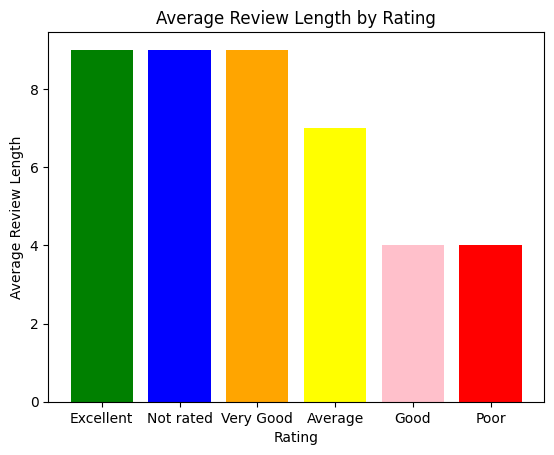

In [ ]:
plt.figure.figsize=(5,3)
colors = ['green', 'blue', 'orange', 'yellow','pink','red']
plt.bar(rating_length_mean['Rating text'], rating_length_mean['review_length'], color = colors)
plt.xlabel('Rating')
plt.ylabel('Average Review Length')
plt.title('Average Review Length by Rating')
plt.show()

####TASK-2 - Vote Analysis

Identify the restaurants with the highest and
lowest number of votes.

In [ ]:
highest_votes = df.groupby('Restaurant Name')['Votes'].max().sort_values(ascending = False).reset_index().nlargest(1,'Votes')
lowest_votes = df.groupby('Restaurant Name')['Votes'].min().sort_values(ascending = True).reset_index().nsmallest(1,'Votes')
print("Restaurants with the highest number of votes:")
print(highest_votes)
print("\nRestaurants with the lowest number of votes:")
print(lowest_votes)

Restaurants with the highest number of votes:
  Restaurant Name  Votes
0            Toit  10934

Restaurants with the lowest number of votes:
     Restaurant Name  Votes
0  Laxmi Food Corner      0


Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [ ]:
num = df[['Aggregate rating','Votes']]
correlation = num.corr().loc['Aggregate rating','Votes']
correlation

0.3136905841954099

A correlation coefficient of 0.313 means there is a positive but weak linear relationship between the number of votes and the rating of a restaurant. While higher ratings are somewhat associated with more votes, the relationship is not strong, and other factors may also play a significant role in the number of votes a restaurant receives.

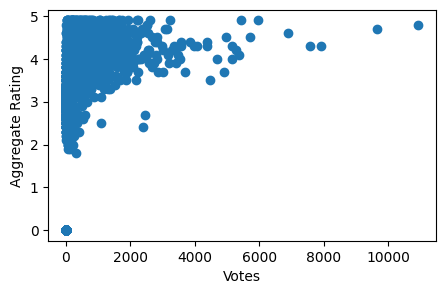

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(df['Votes'], df['Aggregate rating'])
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

####Task 3- Price Range vs. Online Delivery and Table Booking

Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.

In [ ]:
# checking the unique values in these columns
print(df['Price range'].unique())
print(df['Has Online delivery'].unique())
print(df['Has Table booking'].unique())

[3 4 2 1]
['No' 'Yes']
['Yes' 'No']


In [ ]:
# replacing string into number because we can't group a string
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

In [ ]:
print(df['Price range'].unique())
print(df['Has Online delivery'].unique())
print(df['Has Table booking'].unique())

[3 4 2 1]
[0 1]
[1 0]


In [ ]:
relationship = df.groupby('Price range')[['Has Online delivery', 'Has Table booking']].mean()
relationship

,Has Online delivery,Has Table booking
Price range,,
1,0.157741,0.000225
2,0.413106,0.076775
3,0.291903,0.457386
4,0.090444,0.467577


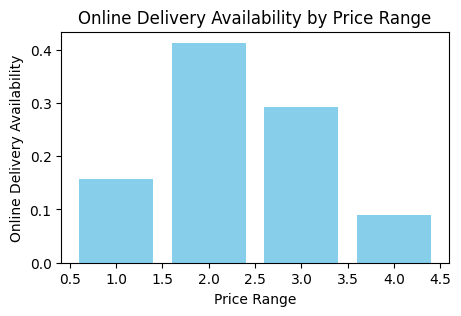

In [ ]:
plt.figure(figsize=(5, 3))
plt.bar(relationship.index, relationship['Has Online delivery'], color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Online Delivery Availability')
plt.title('Online Delivery Availability by Price Range')
plt.show()

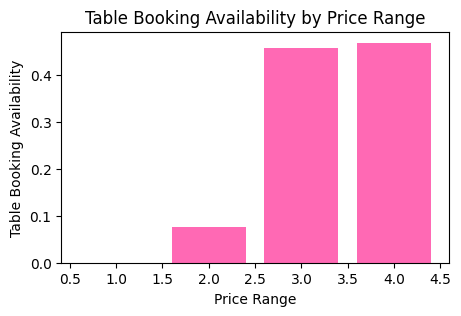

In [ ]:
plt.figure(figsize=(5, 3))
plt.bar(relationship.index, relationship['Has Table booking'], color='hotpink')
plt.xlabel('Price Range')
plt.ylabel('Table Booking Availability')
plt.title('Table Booking Availability by Price Range')
plt.show()

Determine if higher-priced restaurants are
more likely to offer these services.

In [ ]:
high_range = df[df['Price range'] == 4]
offer_delivery =high_range.groupby('Has Online delivery')['Price range'].count()
offer_delivery

Has Online delivery
0    533
1     53
Name: Price range, dtype: int64

In [ ]:
high_range_booking = df[df['Price range'] == 4]
offer =high_range_booking.groupby('Has Table booking')['Price range'].count()
offer

Has Table booking
0    312
1    274
Name: Price range, dtype: int64